### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

#### CHOROPLETH MAP TOTAL TRIP COUNT AND AVERAGE DURATION (COMBINE)

In [18]:
# find count of trips originating in each zip code
zip_count = geo_df.groupby('zip_start', as_index=False)[['ride_id']].count()
zip_count.columns = ['zipcode','trips_count']
zip_count

,zipcode,trips_count
0,07030,423647
1,07032,1
2,07302,296867
3,07304,38256
4,07305,2927
5,07306,76757
6,07307,22817
7,07310,75146
8,07311,7477


In [19]:
#merge zip count with hudson county map
zip_shpc = new_map.merge(
    zip_count, 
    on= 'zipcode',
    how='left')
zip_shpc

,zipcode,geometry,trips_count
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",1
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",76757
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",7477
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",296867
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",38256
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",75146
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",2927
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",22817
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",423647


In [20]:
# find average duration for trips originating in each zip code
zip_dur = geo_df.groupby('zip_start', as_index=False)[['tripduration']].mean()
zip_dur.columns = ['zipcode','avg_duration']
zip_dur

,zipcode,avg_duration
0,07030,9.119092
1,07032,4.450000
2,07302,9.202098
3,07304,13.096246
4,07305,16.947649
5,07306,9.343670
6,07307,12.038861
7,07310,11.180293
8,07311,9.868881


In [21]:
#merge zip duration with hudson county map
zip_shpd = new_map.merge(
    zip_dur, 
    on='zipcode',
    how='left')
zip_shpd

,zipcode,geometry,avg_duration
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",4.450000
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",9.343670
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",9.868881
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",9.202098
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",13.096246
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",11.180293
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",16.947649
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",12.038861
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",9.119092


[]

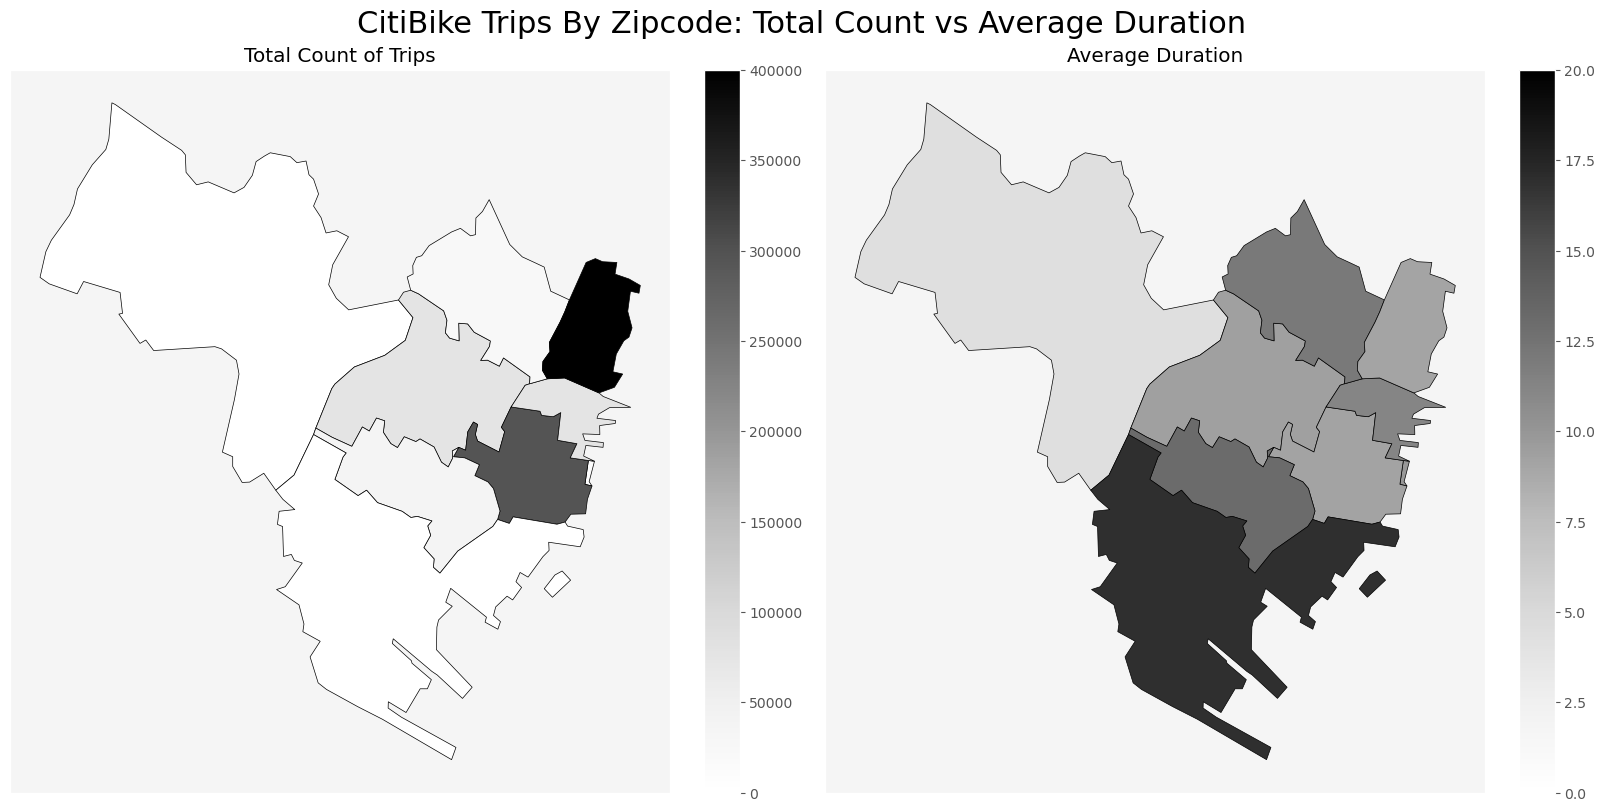

In [22]:
from matplotlib.colors import Normalize
norm1 = Normalize(vmin=0, vmax=400000)
norm2 = Normalize(vmin=0, vmax=20)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 8),sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('CitiBike Trips By Zipcode: Total Count vs Average Duration', fontsize=22)

zip_shpc.plot(ax=ax1, column= 'trips_count', cmap='Greys',norm=norm1, edgecolor = 'black',legend=True)
ax1.title.set_text('Total Count of Trips')
ax1.set_facecolor("whitesmoke")
ax1.set_xticks([])
ax1.set_yticks([])

zip_shpd.plot(ax=ax2, column= 'avg_duration', cmap='Greys',norm=norm2, edgecolor = 'black',legend=True)
ax2.title.set_text('Average Duration')
ax2.set_facecolor("whitesmoke")
ax2.set_xticks([])
ax2.set_yticks([])


In [23]:
### Splitting DataFrame into Weekdays an Weekends by using Filter
# Filter out weekdays vs weekends
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday']
list2 = ['Saturday','Sunday']
weekdays = geo_df[geo_df['startweekday'].isin(list1)]
weekends = geo_df[geo_df['startweekday'].isin(list2)]

#### CHOROPLETH MAP TOTAL TRIP COUNT AND AVERAGE DURATION FOR WEEKDAYS

In [24]:
# find count of trips originating in each zip code
zip_count = weekdays.groupby('zip_start', as_index=False)[['ride_id']].count()
zip_count.columns = ['zipcode','trips_count']
zip_count

,zipcode,trips_count
0,07030,308657
1,07032,1
2,07302,218738
3,07304,27898
4,07305,2119
5,07306,58114
6,07307,16722
7,07310,53327
8,07311,5514


In [25]:
#merge zip count with hudson county map
zip_shpc = new_map.merge(
    zip_count, 
    on= 'zipcode',
    how='left')
zip_shpc

,zipcode,geometry,trips_count
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",1
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",58114
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",5514
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",218738
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",27898
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",53327
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",2119
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",16722
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",308657


In [26]:
# find average duration for trips originating in each zip code
zip_dur = weekdays.groupby('zip_start', as_index=False)[['tripduration']].mean()
zip_dur.columns = ['zipcode','avg_duration']
zip_dur

,zipcode,avg_duration
0,07030,8.404076
1,07032,4.450000
2,07302,8.403333
3,07304,11.935083
4,07305,16.802397
5,07306,8.937229
6,07307,11.713773
7,07310,10.506821
8,07311,8.695234


In [27]:
#merge zip duration with hudson county map
zip_shpd = new_map.merge(
    zip_dur, 
    on='zipcode',
    how='left')
zip_shpd

,zipcode,geometry,avg_duration
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",4.450000
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",8.937229
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",8.695234
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",8.403333
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",11.935083
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",10.506821
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",16.802397
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",11.713773
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",8.404076


[]

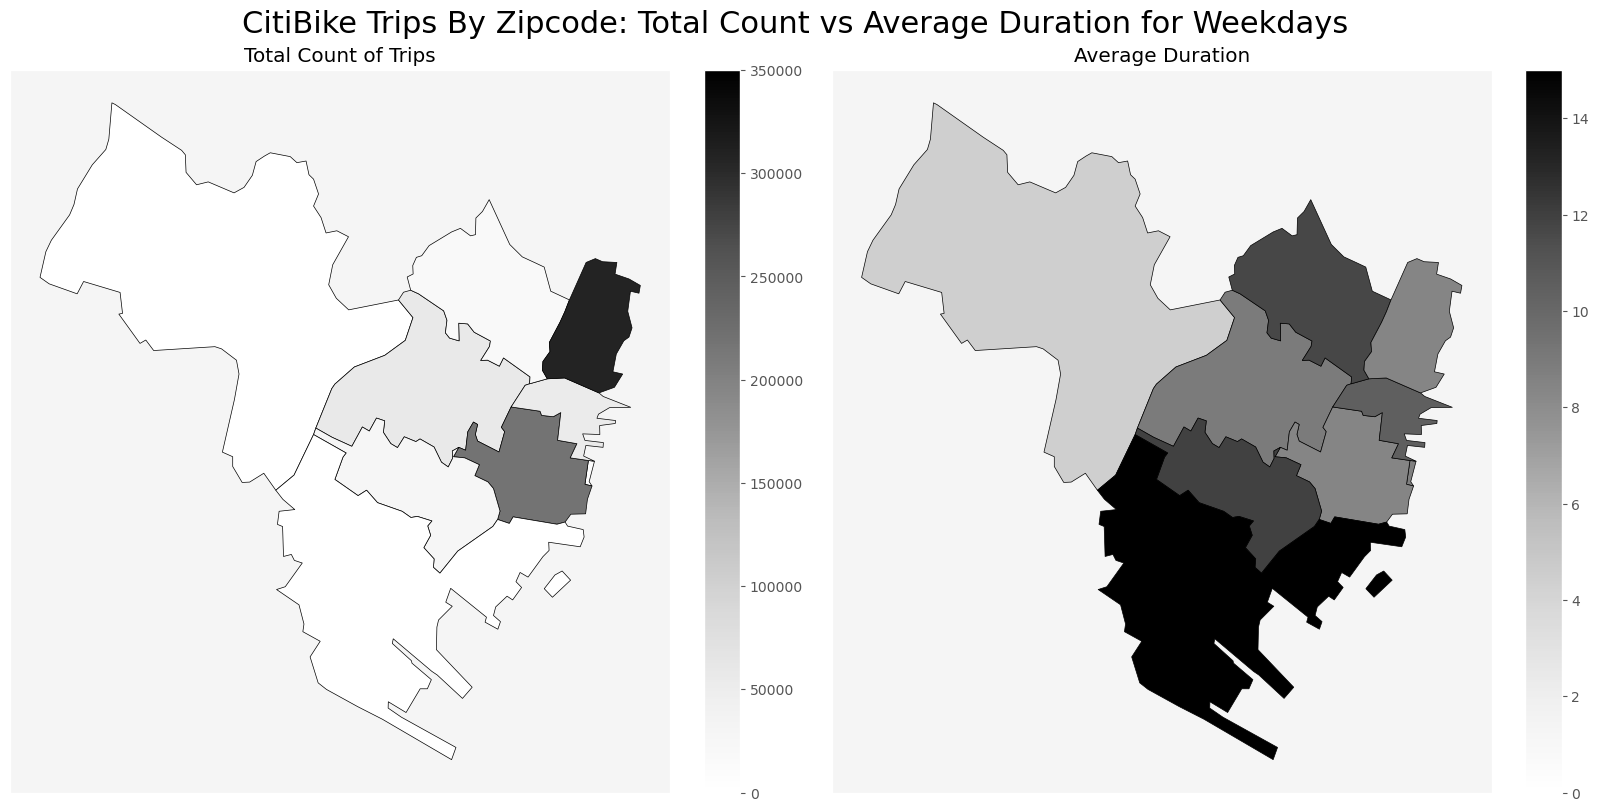

In [28]:
from matplotlib.colors import Normalize
norm1 = Normalize(vmin=0, vmax=350000)
norm2 = Normalize(vmin=0, vmax=15)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 8),sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('CitiBike Trips By Zipcode: Total Count vs Average Duration for Weekdays', fontsize=22)

zip_shpc.plot(ax=ax1, column= 'trips_count', cmap='Greys',norm=norm1, edgecolor = 'black',legend=True)
ax1.title.set_text('Total Count of Trips')
ax1.set_facecolor("whitesmoke")
ax1.set_xticks([])
ax1.set_yticks([])

zip_shpd.plot(ax=ax2, column= 'avg_duration', cmap='Greys',norm=norm2, edgecolor = 'black',legend=True)
ax2.title.set_text('Average Duration')
ax2.set_facecolor("whitesmoke")
ax2.set_xticks([])
ax2.set_yticks([])


#### CHOROPLETH MAP TOTAL TRIP COUNT AND AVERAGE DURATION FOR WEEKENDS

In [29]:
# find count of trips originating in each zip code
zip_count = weekends.groupby('zip_start', as_index=False)[['ride_id']].count()
zip_count.columns = ['zipcode','trips_count']
zip_count

,zipcode,trips_count
0,07030,114990
1,07302,78129
2,07304,10358
3,07305,808
4,07306,18643
5,07307,6095
6,07310,21819
7,07311,1963


In [30]:
#merge zip count with hudson county map
zip_shpc = new_map.merge(
    zip_count, 
    on= 'zipcode',
    how='left')
zip_shpc

,zipcode,geometry,trips_count
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",18643.0
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",1963.0
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",78129.0
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",10358.0
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",21819.0
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",808.0
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",6095.0
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",114990.0


In [31]:
# find average duration for trips originating in each zip code
zip_dur = weekends.groupby('zip_start', as_index=False)[['tripduration']].mean()
zip_dur.columns = ['zipcode','avg_duration']
zip_dur

,zipcode,avg_duration
0,07030,11.038341
1,07302,11.438401
2,07304,16.223695
3,07305,17.328577
4,07306,10.610625
5,07307,12.930761
6,07310,12.826299
7,07311,13.165614


In [32]:
#merge zip duration with hudson county map
zip_shpd = new_map.merge(
    zip_dur, 
    on='zipcode',
    how='left')
zip_shpd

,zipcode,geometry,avg_duration
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",10.610625
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",13.165614
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",11.438401
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",16.223695
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",12.826299
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",17.328577
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",12.930761
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",11.038341


[]

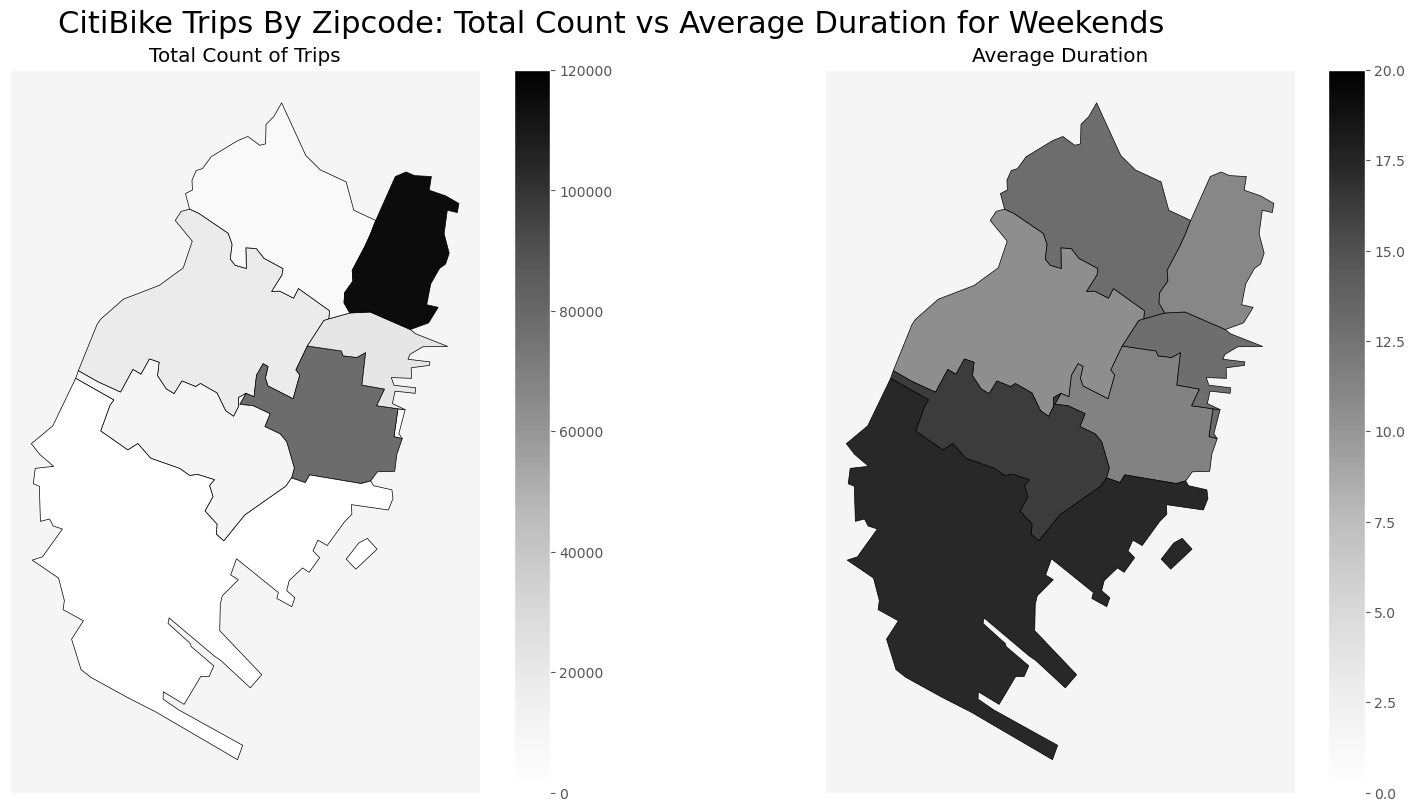

In [33]:
from matplotlib.colors import Normalize
norm1 = Normalize(vmin=0, vmax=120000)
norm2 = Normalize(vmin=0, vmax=20)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 8),sharex=True,sharey=True,constrained_layout=True)

fig.suptitle('CitiBike Trips By Zipcode: Total Count vs Average Duration for Weekends', fontsize=22)

zip_shpc.plot(ax=ax1, column= 'trips_count', cmap='Greys',norm=norm1, edgecolor = 'black',legend=True)
ax1.title.set_text('Total Count of Trips')
ax1.set_facecolor("whitesmoke")
ax1.set_xticks([])
ax1.set_yticks([])

zip_shpd.plot(ax=ax2, column= 'avg_duration', cmap='Greys',norm=norm2, edgecolor = 'black',legend=True)
ax2.title.set_text('Average Duration')
ax2.set_facecolor("whitesmoke")
ax2.set_xticks([])
ax2.set_yticks([])


In [34]:
### Create a sepertae df for member and casual
member_df = geo_df[geo_df['member_casual'] == 'member']
casual_df = geo_df[geo_df['member_casual'] == 'casual']
print(member_df.shape)
print(casual_df.shape)

(668900, 23)
(274995, 23)


### TOTAL TRIP COUNT AND AVERAGE DURATION BY ZIPCODE

### MEMBERS USER TYPE

#### TOTAL TRIP COUNT AND AVERAGE DURATION IN EACH ZIPCODE 

In [35]:
# find count of trips originating in each zip code
mzip_count = member_df.groupby('zip_start', as_index=False)[['ride_id']].count()
mzip_count.columns = ['zipcode','trips_count']
mzip_count

,zipcode,trips_count
0,07030,269524
1,07302,236531
2,07304,27375
3,07305,1740
4,07306,58846
5,07307,15906
6,07310,53139
7,07311,5839


In [36]:
mzip_shpc = new_map.merge(
    mzip_count, 
    on= 'zipcode',
    how='left')
mzip_shpc

,zipcode,geometry,trips_count
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",58846.0
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",5839.0
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",236531.0
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",27375.0
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",53139.0
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",1740.0
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",15906.0
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",269524.0


In [37]:
# find average duration for trips originating in each zip code
mzip_dur = member_df.groupby('zip_start', as_index=False)[['tripduration']].mean()
mzip_dur.columns = ['zipcode','avg_duration']
mzip_dur

,zipcode,avg_duration
0,07030,7.734471
1,07302,7.744645
2,07304,10.888124
3,07305,15.171460
4,07306,8.313760
5,07307,11.156866
6,07310,9.772559
7,07311,7.755208


In [38]:
mzip_shpd = new_map.merge(
    mzip_dur, 
    on='zipcode',
    how='left')
mzip_shpd

,zipcode,geometry,avg_duration
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",NaN
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",8.313760
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",7.755208
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",7.744645
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",10.888124
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",9.772559
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",15.171460
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",11.156866
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",7.734471


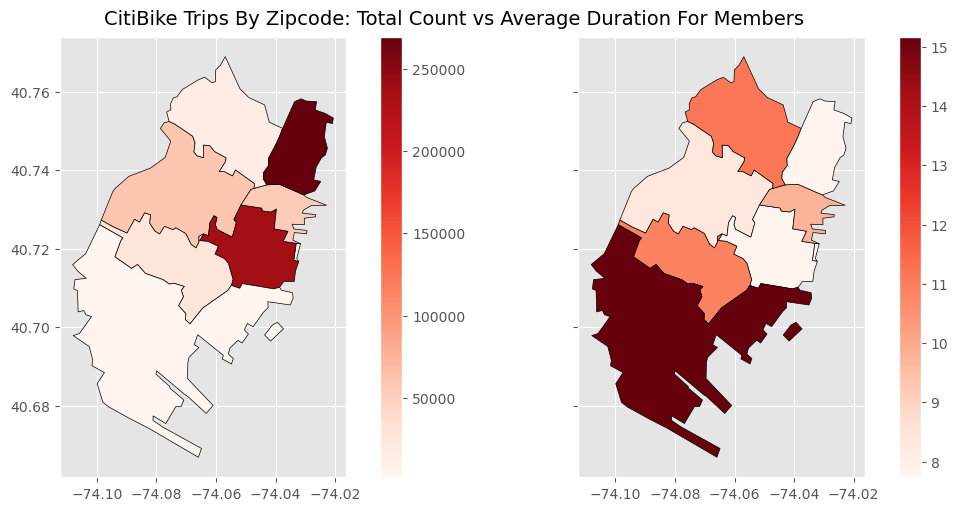

In [39]:
## Code to add base map
#ax = zip_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
#ctx.add_basemap(ax,crs=zip_shp.crs,zoom=12)

## Code to add Choropleth Map
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5),
                              sharex=True,
                              sharey=True,
                              constrained_layout=True)
fig.suptitle('CitiBike Trips By Zipcode: Total Count vs Average Duration For Members', fontsize=14)

mzip_shpc.plot(ax=ax1, column= 'trips_count', cmap='Reds', edgecolor = 'black',legend=True)

mzip_shpd.plot(ax=ax2, column= 'avg_duration', cmap='Reds', edgecolor = 'black',legend=True)

plt.show()

### CASUAL USER TYPE

#### TOTAL TRIP COUNT AND AVERAGE DURATION IN EACH ZIPCODE 

In [40]:
czip_count = casual_df.groupby('zip_start', as_index=False)[['ride_id']].count()
czip_count.columns = ['zipcode','trips_count']
czip_count

,zipcode,trips_count
0,07030,154123
1,07032,1
2,07302,60336
3,07304,10881
4,07305,1187
5,07306,17911
6,07307,6911
7,07310,22007
8,07311,1638


In [41]:
czip_shpc = new_map.merge(
    czip_count, 
    on= 'zipcode',
    how='left')
czip_shpc

,zipcode,geometry,trips_count
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",1
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",17911
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",1638
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",60336
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",10881
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",22007
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",1187
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",6911
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",154123


In [42]:
# find average duration for trips originating in each zip code
czip_dur = casual_df.groupby('zip_start', as_index=False)[['tripduration']].mean()
czip_dur.columns = ['zipcode','avg_duration']
czip_dur

,zipcode,avg_duration
0,07030,11.540460
1,07032,4.450000
2,07302,14.915648
3,07304,18.651557
4,07305,19.551331
5,07306,12.727403
6,07307,14.068816
7,07310,14.579463
8,07311,17.403516


In [43]:
czip_shpd = new_map.merge(
    czip_dur, 
    on='zipcode',
    how='left')
czip_shpd

,zipcode,geometry,avg_duration
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",4.450000
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",12.727403
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",17.403516
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",14.915648
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",18.651557
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",14.579463
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",19.551331
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",14.068816
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",11.540460


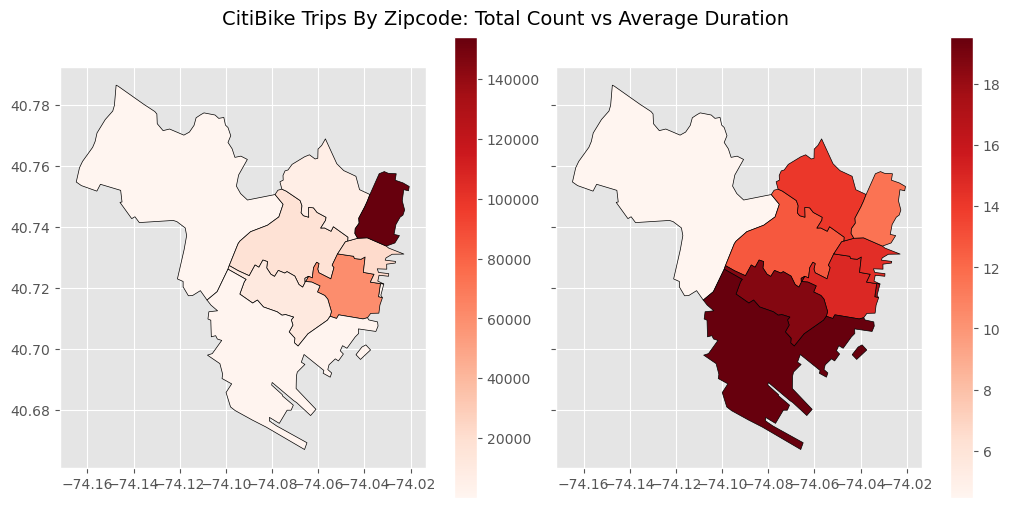

In [44]:
#Code to add Choropleth Map
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5),
                              sharex=True,
                              sharey=True,
                              constrained_layout=True)
fig.suptitle('CitiBike Trips By Zipcode: Total Count vs Average Duration', fontsize=14)

czip_shpc.plot(ax=ax1, column= 'trips_count', cmap='Reds', edgecolor = 'black',legend=True)

czip_shpd.plot(ax=ax2, column= 'avg_duration', cmap='Reds', edgecolor = 'black',legend=True)

plt.show()